In [1]:
from dueling_dqn import DuelingDQN
import gym

In [2]:
env = gym.make('Pendulum-v0')
env = env.unwrapped

In [3]:
ACTION_SPACE = 11
MEMORY_SIZE = 3000

In [4]:

RL = DuelingDQN(n_actions=ACTION_SPACE, n_features=3, memory_size=MEMORY_SIZE, e_greedy_increment=0.001)

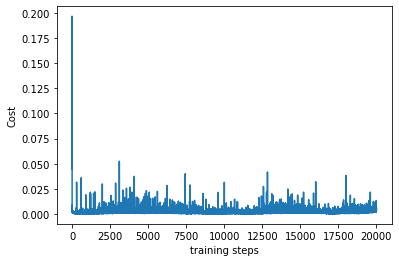

In [5]:
observation = env.reset()
total_steps = 0
while True:
    if total_steps > MEMORY_SIZE:
        env.render()
    action = RL.choose_action(observation)
    f_action = -2 + 4 / (ACTION_SPACE - 1) * action # convert to [-2 ~ 2] float actions
    observation_, reward, done, info = env.step([f_action])

    # normalize 到这个区间 (-1, 0). 立起来的时候 reward = 0.
    # 立起来以后的 Q target 会变成 0, 因为 Q_target = r + gamma * Qmax(s', a') = 0 + gamma * 0
    # 所以这个状态时的 Q 值大于 0 时, 就出现了 overestimate.
    reward /= 10

    RL.store_transition(observation, action, reward, observation_)

    if total_steps > 2000:
        RL.learn()

    if total_steps - 2000 > 20000:
        break

    observation = observation_
    total_steps += 1
env.close()
RL.plot_cost()